# Washington and Idaho Comparison

In [1]:
import pandas as pd
import numpy as np 
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# import data
washington_df = pd.read_csv("../state_pop/washington_population_cleaned.csv")
idaho_df = pd.read_csv("../state_pop/idaho_population_cleaned.csv")

# dataframe for tables
washington_df = pd.DataFrame(data=washington_df)
idaho_df = pd.DataFrame(data=idaho_df)

In [3]:
washington_df
washington_df = washington_df.dropna() # There were unwanted values at the bottom
# washington_df

In [4]:
washington_df.describe()

,year,washington_population
count,122.000000,122.000000
mean,1960.500000,3378.369279
std,35.362409,2074.441930
min,1900.000000,523.000000
25%,1930.250000,1571.250000
50%,1960.500000,2868.500000
75%,1990.750000,4985.277250
max,2021.000000,7738.692000


In [5]:
# only want data from 2005 and beyond

wa_2005 = washington_df.iloc[105:]

<AxesSubplot:xlabel='year'>

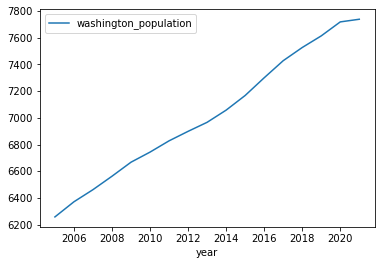

In [6]:
wa_2005.plot.line(x="year", y="washington_population")

# Idaho

In [7]:
# idaho_df
idaho_df.head()

,year,idaho_population
0,1900,163.0
1,1901,176.0
2,1902,199.0
3,1903,216.0
4,1904,229.0


In [8]:
id_2005 = idaho_df.iloc[105:]

<AxesSubplot:xlabel='year'>

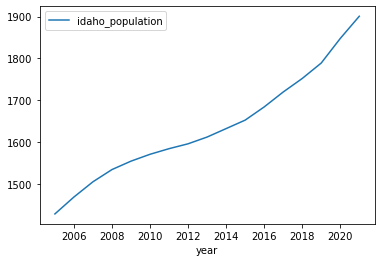

In [9]:
id_2005.plot.line(x="year", y="idaho_population")

# Merging both DS

#### https://pandas.pydata.org/docs/user_guide/merging.html (sql methods)
#### https://dataschool.com/how-to-teach-people-sql/sql-join-types-explained-visually/

In [10]:
# need the idaho population without the year column 
merged_df = pd.merge(wa_2005, id_2005, how="outer", on=["year"])
merged_df.head()

,year,washington_population,idaho_population
0,2005.0,6257.305,1428.241
1,2006.0,6370.753,1468.669
2,2007.0,6461.587,1505.105
3,2008.0,6562.231,1534.320
4,2009.0,6667.426,1554.439


### making the values into a list

In [11]:
washington_values = merged_df["washington_population"].tolist()

In [12]:
idaho_values = merged_df["idaho_population"].tolist()

In [13]:
time_values = merged_df.index.tolist()

In [14]:
vert_line = time_values[9]

### Little explanation
### I used the vert_line variable to attach 2014, or the 9th index point. That will be my veritcal line to show the period before and after legalization
#### https://www.tutorialspoint.com/how-do-you-plot-a-vertical-line-on-a-time-series-plot-in-pandas#:~:text=Using%20panda%20we%20can%20create,%2C%20linestyle%3D%22dashed%22. Used this to look at adding that vertical line

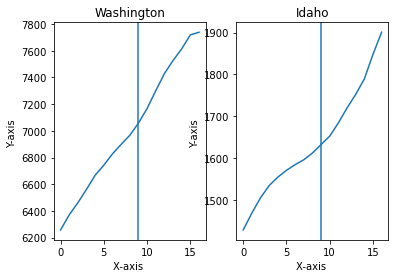

In [15]:
from matplotlib import pyplot as plt
xPoints = time_values
y1Points = washington_values
y2Points = idaho_values

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(xPoints, y1Points)
plt.axvline(x= vert_line)
plt.title("Washington")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')

plt.subplot(1, 2, 2) # index 2
plt.plot(xPoints, y2Points)
plt.axvline(x= vert_line)
plt.title("Idaho")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')

plt.show()